# Testing the Model

This Jupyter Notebook contains some testing done for the machine learning model that will be used for the project.

## Setting Up

First, we need to extract the features from the `binary-features.txt` file.

In [25]:
from sklearn.model_selection import train_test_split
import numpy as np
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

NUM_FEATURES = 11

X = np.genfromtxt("binary-features.txt", delimiter=",", usecols=np.arange(NUM_FEATURES), skip_header=1)
y = np.genfromtxt("binary-features.txt", delimiter=",", usecols=NUM_FEATURES, skip_header=1)

In [26]:
unique, counts = np.unique(y, return_counts=True)
for i in range(0, len(unique)):
    print(f"{unique[i]}: {counts[i]}")

0.0: 5
1.0: 9
2.0: 9
3.0: 6
4.0: 6
7.0: 6
8.0: 19
9.0: 7
10.0: 6
11.0: 7
12.0: 8
15.0: 10
16.0: 6
18.0: 8
19.0: 5
20.0: 5
21.0: 9
22.0: 12
23.0: 5
24.0: 8
25.0: 12
26.0: 7
28.0: 9
29.0: 8
30.0: 6
31.0: 8
32.0: 13
33.0: 5
34.0: 5
36.0: 5
37.0: 5
39.0: 7
40.0: 6
41.0: 9
42.0: 7
43.0: 8
44.0: 7
46.0: 8
47.0: 7
48.0: 8
49.0: 5
52.0: 14
53.0: 7
54.0: 8
55.0: 7
56.0: 5
57.0: 7
58.0: 6
59.0: 22
60.0: 9
61.0: 6
62.0: 15
63.0: 6
64.0: 9
65.0: 14
67.0: 5
68.0: 7
69.0: 5
70.0: 5
71.0: 5
72.0: 7
74.0: 6
75.0: 9
76.0: 5
77.0: 8
78.0: 8
79.0: 6
80.0: 19
82.0: 5
83.0: 5
85.0: 13
88.0: 7
89.0: 5
90.0: 6
91.0: 5
92.0: 6
93.0: 6
94.0: 5
95.0: 5
97.0: 5
98.0: 6
99.0: 5
100.0: 6
101.0: 6
102.0: 5
103.0: 5
104.0: 6
107.0: 11
110.0: 5
111.0: 8
112.0: 5
114.0: 8
115.0: 7
116.0: 7
117.0: 13
118.0: 7
120.0: 8
121.0: 6
122.0: 6
123.0: 5
124.0: 14
125.0: 7
126.0: 7
127.0: 5
128.0: 5
129.0: 5


## Getting Train and Test Sets

Now we have a set of features and a set of labels, we can get the training and testing sets using `sklearn`'s `train_test_split` function.

In [ ]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2408, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Choosing a Model

To try and get the best model for the task of binary authorship attribution, we must determine the type of problem we face. Because we are trying to predict a class given a set of features, we need to use **classification** models.

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = [
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("SVC", SVC(kernel="rbf", C=1.0, gamma="scale")),
    ("LogisticRegression", LogisticRegression(max_iter=2000)),
    ("RandomForest", RandomForestClassifier(n_estimators=300, class_weight="balanced"))
]

results = {}

for name, model in models:
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.4f}")

    results[name] = {
        "model": model,
        "predictions": preds,
        "accuracy": acc,
    }


Training KNN...
KNN Accuracy: 0.2323

Training SVC...
SVC Accuracy: 0.1667

Training LogisticRegression...
LogisticRegression Accuracy: 0.1616

Training RandomForest...
RandomForest Accuracy: 0.3990


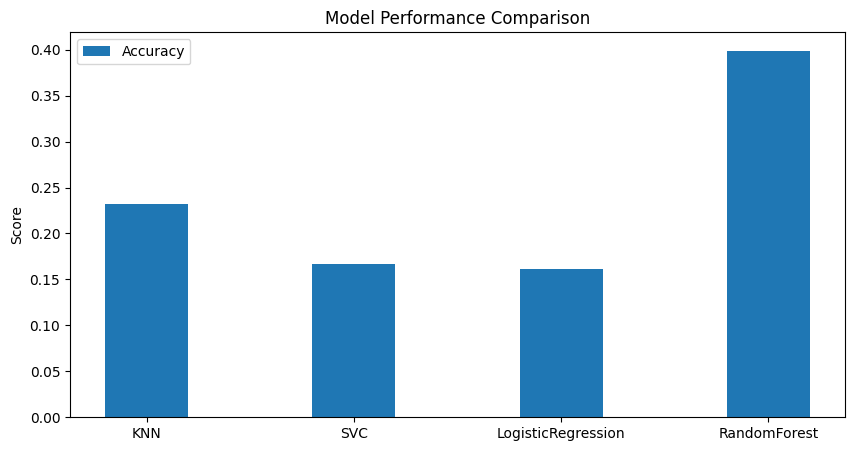

In [30]:
import matplotlib.pyplot as plt

model_names = list(results.keys())
accuracies = [results[m]["accuracy"] for m in model_names]

plt.figure(figsize=(10,5))
x = np.arange(len(model_names))

plt.bar(x, accuracies, width=0.4, label="Accuracy")

plt.xticks(x, model_names)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()

plt.show()